## Groundnut Yield Prediction

### About Dataset

#### Context

This dataset contains India's crop production based on land.

#### Content

- **State:** 
  - Jammu and Kashmir: 0
  - Jharkhand: 1
  - Bihar: 2
  - Uttarakhand: 3
  - Chhattisgarh: 4
  - Punjab: 5
  - Arunachal Pradesh: 6
  - Odisha: 7
  - Kerala: 8
  - Himachal Pradesh: 9
  - Tamil Nadu: 10
  - Andaman and Nicobar Islands: 11

- **Year:** 1997-2015

- **Crop:** 
  - Black pepper: 0
  - Mesta: 1
  - Sannhamp: 2
  - Cauliflower: 3
  - Tomato: 4
  - Citrus Fruit: 5
  - Lentil: 6
  - Dry ginger: 7
  - Drum Stick: 8
  - Bottle Gourd: 9
  - Beet Root: 10
  - Cardamom: 11
  - Onion: 12
  - Yam: 13
  - Samai: 14
  - other oilseeds: 15
  - Bhindi: 16
  - Groundnut: 17
  - Turnip: 18
  - Cowpea(Lobia): 19
  - Sesamum: 20
  - Pear: 21
  - Ginger: 22
  - Urad: 23
  - Cashewnut Raw: 24
  - Papaya: 25
  - Brinjal: 26
  - Rubber: 27
  - Khesari: 28
  - Soyabean: 29
  - Maize: 30
  - Cabbage: 31
  - Castor seed: 32
  - Tea: 33
  - Other Rabi pulses: 34
  - Dry chillies: 35
  - Other Cereals & Millets: 36
  - Linseed: 37
  - Jack Fruit: 38
  - Rice: 39
  - Beans & Mutter(Vegetable): 40
  - Moong(Green Gram): 41
  - Coconut : 42
  - Plums: 43
  - Tapioca: 44
  - Cotton(lint): 45
  - Korra: 46
  - Potato: 47
  - Pulses total: 48
  - Coriander: 49
  - Wheat: 50
  - Ber: 51
  - Sugarcane: 52
  - Pome Granet: 53
  - Coffee: 54
  - Pome Fruit: 55
  - Niger seed: 56
  - Bajra: 57
  - Varagu: 58
  - Moth: 59
  - Redish: 60
  - Jute: 61
  - Water Melon: 62
  - other misc. pulses: 63
  - Arecanut: 64
  - Safflower: 65
  - Jowar: 66
  - Sweet potato: 67
  - Carrot: 68
  - Grapes: 69
  - Guar seed: 70
  - Other Kharif pulses: 71
  - Lab-Lab: 72
  - Cond-spcs other: 73
  - Oilseeds total: 74
  - Pineapple: 75
  - Apple: 76
  - Total foodgrain: 77
  - Arhar/Tur: 78
  - Horse-gram: 79
  - Bitter Gourd: 80
  - Peach: 81
  - Cucumber: 82
  - Ragi: 83
  - Barley: 84
  - Paddy: 85
  - Tobacco: 86
  - Ribed Guard: 87
  - Orange: 88
  - Turmeric: 89
  - Garlic: 90
  - Small millets: 91
  - Snak Guard: 92
  - Litchi: 93
  - Mango: 94
  - Other Vegetables: 95
  - Peas & beans (Pulses): 96
  - Masoor: 97
  - Blackgram: 98
  - Banana: 99
  - Other Fresh Fruits: 100
  - Gram: 101
  - Cashewnut: 102
  - Sunflower: 103
  - Other Citrus Fruit: 104
  - Rapeseed &Mustard: 105
  - Pump Kin: 106
  - Ash Gourd: 107

- **Area:** Hectare

- **Rain:** mm

### Source

Data is collected from multiple sources: The Indian government, Data World, Kaggle, etc.


In [1]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from matplotlib.lines import Line2D

In [2]:
# Read data
df = pd.read_csv("dataset.csv")
df

,State,Year,Crop,Area,Rain,Production
0,11,2000,64,1254.0,2763.2,2000.0
1,11,2000,71,2.0,2763.2,1.0
2,11,2000,39,102.0,2763.2,321.0
3,11,2000,99,176.0,2763.2,641.0
4,11,2000,102,720.0,2763.2,165.0
...,...,...,...,...,...,...
76098,3,2014,12,26.0,1287.4,172.0
76099,3,2014,48,5346.0,1287.4,4630.0
76100,3,2014,39,9919.0,1287.4,16499.0
76101,3,2014,103,3.0,1287.4,3.0


In [3]:
# Filter the data to get only groundnut yields.
df = df[df["Crop"] == 17]
df

,State,Year,Crop,Area,Rain,Production
117,11,2010,17,4.75,3157.1,6.8
191,11,2010,17,15.50,3157.1,7.6
309,6,1997,17,285.00,2274.9,277.0
320,6,1998,17,120.00,3616.7,126.0
498,6,1997,17,80.00,2274.9,95.0
...,...,...,...,...,...,...
75626,3,2010,17,57.00,1424.0,74.0
75650,3,2011,17,49.00,1564.7,65.0
75672,3,2012,17,38.00,1223.9,51.0
75694,3,2013,17,22.00,1735.4,29.0


In [4]:
# Removing null columns
null_percentage = df.isnull().mean() * 100
null_cols = null_percentage[null_percentage > 50]
# Check if there are null columns with nulls greater than 50%
if not null_cols.empty:
    # Drop null columns
    df.drop(null_cols.index, axis=1, inplace=True)
    print("Null columns removed:", null_cols.index.tolist())
else:
    print("No null columns with nulls greater than 50%")

# Drop the null rows
df = df.dropna()
# Drop state column.
df = df.drop(["State", "Crop"], axis=1)



No null columns with nulls greater than 50%


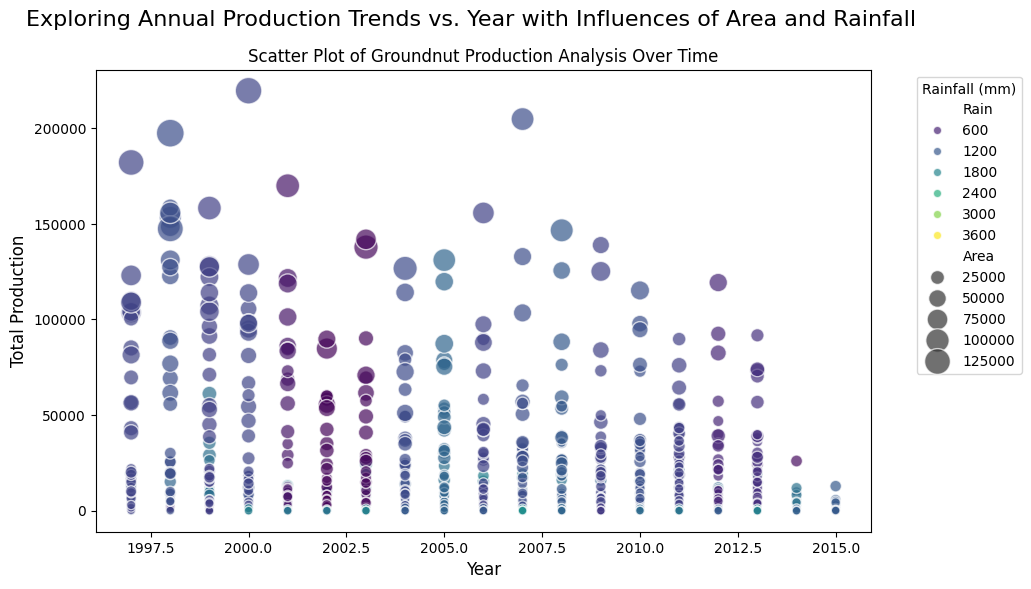

In [5]:
# Scatter plot to show relationships
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Year', y='Production', size='Area',
                          sizes=(40, 400), hue='Rain', palette='viridis',
                          alpha=0.7, edgecolor="w", linewidth=1)

# Enhancing the legend and moving it outside the plot
plt.legend(title="Rainfall (mm)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting descriptive titles and axis labels
plt.title("Scatter Plot of Groundnut Production Analysis Over Time")  # Main title
plt.xlabel("Year")  # X-axis label
plt.ylabel("Production Volume")  # Y-axis label

# Adding a subtitle for additional clarity
plt.suptitle('Exploring Annual Production Trends vs. Year with Influences of Area and Rainfall', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production', fontsize=12)

plt.show()


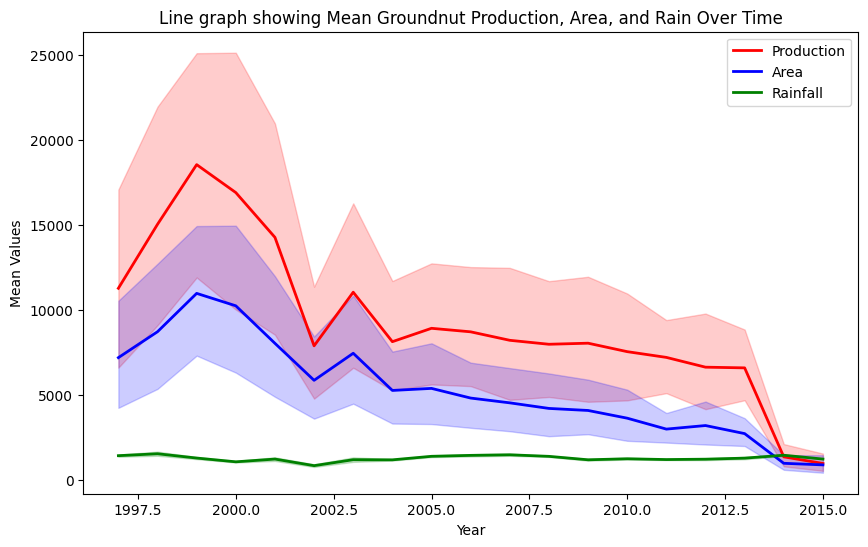

In [6]:
# Line plot
plt.figure(figsize=(10, 6))
line = sns.lineplot(data=df, x='Year', y='Production', estimator='mean', color='red', linewidth=2)
sns.lineplot(data=df, x='Year', y='Area', estimator='mean', color='blue', linewidth=2)
sns.lineplot(data=df, x='Year', y='Rain', estimator='mean', color='green', linewidth=2)

# Set plot title and labels
plt.title("Line graph showing Mean Groundnut Production, Area, and Rain Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Values")

legend_elements = [
    Line2D([0], [0], color="red", lw=2, label='Production'),
    Line2D([0], [0], color="blue", lw=2, label='Area'),
    Line2D([0], [0], color="green", lw=2, label='Rainfall')
]
plt.legend(handles=legend_elements)

plt.show()
